# 6.4 Machine Learning Part 1

#### This script contains the following:¶
#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### 5. Repeating steps for wage_eur and age

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Setting path to data
path = r'C:\Users\Anwender\Desktop\ballfifa20'

In [4]:
# Import the cleaned Data
df_relationsip = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'clean20_fifa_play.csv'), index_col = False)

In [5]:
df_relationsip.head()

,Unnamed: 0,ID,short_name,long_name,age,height_cm,weight_kg,nationality,club,overall,...,passing,dribbling,defending,physic,power_shot_power,power_jumping,power_long_shots,mentality_aggression,mentality_interceptions,mentality_penalties
0,0,158023,L. Messi,Lionel Andrés Messi Cuccittini,32,170,72,Argentina,FC Barcelona,94,...,92.000000,96.00000,39.000000,66.000000,86,68,94,48,40,75
1,1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,187,83,Portugal,Juventus,93,...,82.000000,89.00000,35.000000,78.000000,95,95,93,63,29,85
2,2,190871,Neymar Jr,Neymar da Silva Santos Junior,27,175,68,Brazil,Paris Saint-Germain,92,...,87.000000,95.00000,32.000000,58.000000,80,61,84,51,36,90
3,3,200389,J. Oblak,Jan Oblak,26,188,87,Slovenia,Atlético Madrid,91,...,57.206209,62.52562,51.506795,64.850767,59,78,12,34,19,11
4,4,183277,E. Hazard,Eden Hazard,28,175,74,Belgium,Real Madrid,91,...,86.000000,94.00000,35.000000,66.000000,82,56,80,54,41,88


In [6]:
df_relationsip.columns

Index(['Unnamed: 0', 'ID', 'short_name', 'long_name', 'age', 'height_cm',
       'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur',
       'wage_eur', 'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'release_clause_eur',
       'team_position', 'joined', 'contract_valid_until', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'power_shot_power',
       'power_jumping', 'power_long_shots', 'mentality_aggression',
       'mentality_interceptions', 'mentality_penalties'],
      dtype='object')

In [7]:
df_relationsip.shape

(18038, 35)

In [8]:
# Check for missing values

df_relationsip.isnull().sum()

Unnamed: 0                     0
ID                             0
short_name                     0
long_name                      0
age                            0
height_cm                      0
weight_kg                      0
nationality                    0
club                           0
overall                        0
potential                      0
value_eur                      0
wage_eur                       0
preferred_foot                 0
international_reputation       0
weak_foot                      0
skill_moves                    0
work_rate                      0
body_type                      0
release_clause_eur             0
team_position                  0
joined                      1048
contract_valid_until           0
pace                           0
shooting                       0
passing                        0
dribbling                      0
defending                      0
physic                         0
power_shot_power               0
power_jump

In [9]:
# Not needed for this analysis
df_relationsip.drop(['joined'], axis=1, inplace=True)

In [10]:
dups = df_relationsip.duplicated()

In [11]:
dups.shape # No dups

(18038,)

In [12]:
# Check for missing values

df_relationsip.isnull().sum()

Unnamed: 0                  0
ID                          0
short_name                  0
long_name                   0
age                         0
height_cm                   0
weight_kg                   0
nationality                 0
club                        0
overall                     0
potential                   0
value_eur                   0
wage_eur                    0
preferred_foot              0
international_reputation    0
weak_foot                   0
skill_moves                 0
work_rate                   0
body_type                   0
release_clause_eur          0
team_position               0
contract_valid_until        0
pace                        0
shooting                    0
passing                     0
dribbling                   0
defending                   0
physic                      0
power_shot_power            0
power_jumping               0
power_long_shots            0
mentality_aggression        0
mentality_interceptions     0
mentality_

<AxesSubplot:xlabel='value_eur', ylabel='Count'>

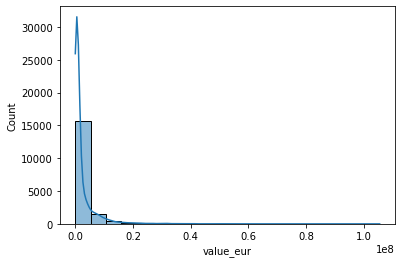

In [13]:
sns.histplot(df_relationsip['value_eur'], bins=20, kde = True)
# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

#### The data is okay, no outrageous number

In [14]:
df_relationsip['value_eur'].mean() # Check the mean

2517088.3689987804

In [15]:
df_relationsip['value_eur'].median() # Check the median

725000.0

In [16]:
df_relationsip['value_eur'].max() # Check the max

105500000

# 3. Data prep for regression analysis
#### Value_eur and Potential

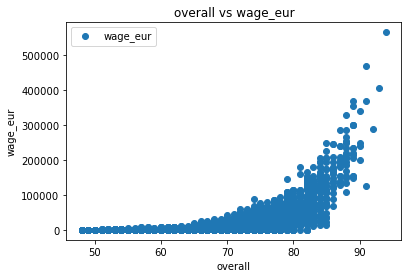

In [17]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_relationsip.plot(x = 'overall', y='wage_eur',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('overall vs wage_eur')  
plt.xlabel('overall')  
plt.ylabel('wage_eur')  
plt.show()

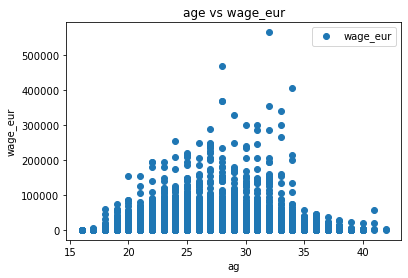

In [18]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_relationsip.plot(x = 'age', y='wage_eur',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('age vs wage_eur')  
plt.xlabel('ag')  
plt.ylabel('wage_eur')  
plt.show()

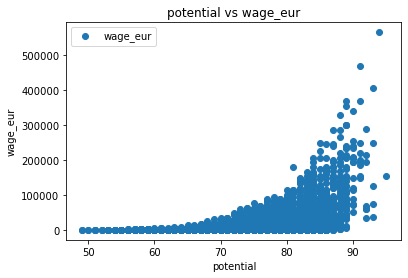

In [19]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_relationsip.plot(x = 'potential', y='wage_eur',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('potential vs wage_eur')  
plt.xlabel('potential')  
plt.ylabel('wage_eur')  
plt.show()

### Hypothesis
#### As player potential rises, so do their market value increases

In [20]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_relationsip[['overall','age','potential']].values
y = df_relationsip['wage_eur'].values.reshape(-1,1)

In [21]:
X.shape

(18038, 3)

In [22]:
y.shape

(18038, 1)

In [23]:
X

array([[94, 32, 94],
       [93, 34, 93],
       [92, 27, 92],
       ...,
       [48, 19, 56],
       [48, 18, 54],
       [48, 26, 51]], dtype=int64)

In [24]:
y

array([[565000],
       [405000],
       [290000],
       ...,
       [  1000],
       [  1000],
       [  2000]], dtype=int64)

In [25]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4. Regression analysis

In [26]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [27]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

In [29]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [33]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1645.41308393 -319.40627294  403.18212547]]
Mean squared error:  278463809.24672455
R2 score:  0.3759331806732328


In [32]:
# Analysis of Coeficients
coef_df = pd.DataFrame([X,regression.coef_], index=['variable', 'coef']).T
coef_df.sort_values(by='coef', ascending=False)

,variable,coef
0,"[[94, 32, 94], [93, 34, 93], [92, 27, 92], [91...","[[1645.4130839292345, -319.4062729372661, 403...."


In [30]:
y_predicted

array([[34102.33895828],
       [-6907.66891414],
       [17107.44931931],
       ...,
       [18314.28614448],
       [-6347.21311835],
       [12620.064361  ]])

In [31]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,35000,34102.338958
1,4000,-6907.668914
2,3000,17107.449319
3,2000,-18238.311800
4,1000,8203.467669
5,2000,-13938.175543
6,12000,17994.879872
7,4000,7871.073810
8,1000,1725.288182
9,1000,-84.967056


## Thoughts about how the model performed
#### Note - The slope is a coefficient that tells you how the y variable changes when X changes. A negative slope value indicates a negative relationship (as X rises, y drops), and a positive slope indicates a positive relationship (as X rises, so does y). A coefficient of zero would mean that as X rises, y stays the same.
#### The slope of the model above, shows the line moves in an upward direction that would suggest a positive correlation as the potential of players increases so does the price value of the player increases  but the actual data points seem to be on a constant '0' value.
#### The MSE also shows how close a regression line is to a set of points but in this case the MSE value is high which means that it does not have a good fit.
#### The R2 Score above also tells us that there is a weak negative correlation.

# Compare how the regression fits the training set

In [32]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [33]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [34]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1645.41308393 -319.40627294  403.18212547]]
Mean squared error:  304786311.2003792
R2 score:  0.34728001341893855


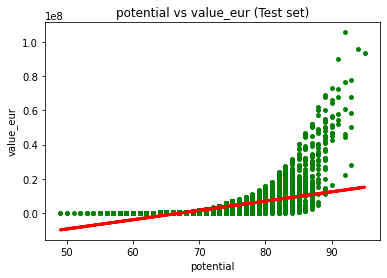

In [34]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('potential vs value_eur (Test set)')
plot_test.xlabel('potential')
plot_test.ylabel('value_eur')
plot_test.show()

## (do keep in mind that having a high R2 score on the train set and a much lower score on the test set likely means you’ve overfitted your model)
## The training test is higher than the training set with no much difference (confirmed by an R2 score of 0.34) This means that i haven’t overfit the model! However, it also confirms that the relationship I'm exploring isn’t purely linear

#  Checking the regression for wage and age

#### Extreme values checks

<AxesSubplot:xlabel='wage_eur', ylabel='Count'>

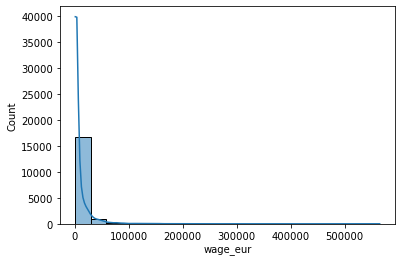

In [35]:
sns.histplot(df_relationsip['wage_eur'], bins=20, kde = True)

In [36]:
df_relationsip['wage_eur'].mean() # Check the mean

9582.76970839339

In [37]:
df_relationsip['wage_eur'].median() # Check the mean

3000.0

In [38]:
df_relationsip['wage_eur'].max() # Check the mean

565000

# 3. Data prep for regression analysis

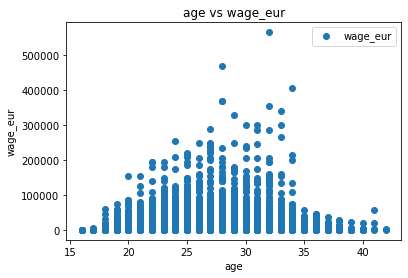

In [39]:
df_relationsip.plot(x = 'age', y='wage_eur',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('age vs wage_eur')  
plt.xlabel('age')  
plt.ylabel('wage_eur')  
plt.show()

## Hypothesis
#### As the players get older, so do their wages decreases

In [40]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_1 = df_relationsip['age'].values.reshape(-1,1)
y_1 = df_relationsip['wage_eur'].values.reshape(-1,1)

In [41]:
X_1

array([[32],
       [34],
       [27],
       ...,
       [19],
       [18],
       [26]], dtype=int64)

In [42]:
y_1

array([[565000],
       [405000],
       [290000],
       ...,
       [  1000],
       [  1000],
       [  2000]], dtype=int64)

In [43]:
# Split data into a training set and a test set.

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=0)

# Regression Analysis

In [44]:
# Create a regression object.

regression_1 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [45]:
# Fit the regression object onto the training set.

regression_1.fit(X_1_train, y_1_train)

LinearRegression()

In [46]:
# Predict the values of y using X.

y_predicted_1 = regression_1.predict(X_1_test)

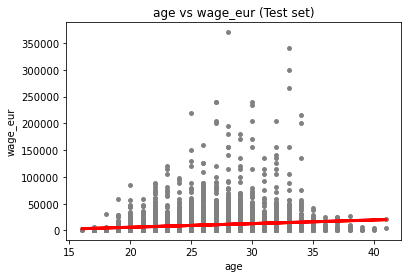

In [47]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_1_test, y_1_test, color='gray', s = 15)
plot_test.plot(X_1_test, y_predicted_1, color='red', linewidth =3)
plot_test.title('age vs wage_eur (Test set)')
plot_test.xlabel('age')
plot_test.ylabel('wage_eur')
plot_test.show()

In [48]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_1_test, y_predicted_1) # This is the mean squared error
r2 = r2_score(y_1_test, y_predicted_1) # This is the R2 score. 

In [49]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression_1.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[678.99595542]]
Mean squared error:  431558927.77933675
R2 score:  0.03283084383616841


In [50]:
y_predicted_1

array([[ 7336.09690163],
       [12768.06454499],
       [ 8694.08881247],
       ...,
       [11410.07263415],
       [ 5299.10903537],
       [14805.05241125]])

In [51]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_1_test.flatten(), 'Predicted': y_predicted_1.flatten()})
data.head(30)

,Actual,Predicted
0,35000,7336.096902
1,4000,12768.064545
2,3000,8694.088812
3,2000,8015.092857
4,1000,15484.048367
5,2000,6657.100946
6,12000,12089.068590
7,4000,10052.080723
8,1000,10052.080723
9,1000,5978.104991


## Thoughts about how the model performed
#### The slope of the model above, shows as the age increases but stays constant at 0 and still has a negative correlation
#### The MSE also shows that the regression line isn’t an accurate representation of the data, it's distance is farther away from the regression line
#### The R2 Score above also tells us that there is a weak negative correlation.

# Compare how the regression fits the training set between age and wage

In [52]:
# Predict.

y_predicted_train_1 = regression_1.predict(X_1_train) # This is predicting X_1_train!

In [53]:
rmse = mean_squared_error(y_1_train, y_predicted_train_1)
r2 = r2_score(y_1_train, y_predicted_train_1)

In [54]:
print('Slope:' ,regression_1.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[678.99595542]]
Mean squared error:  457031567.26983225
R2 score:  0.021236756727690986


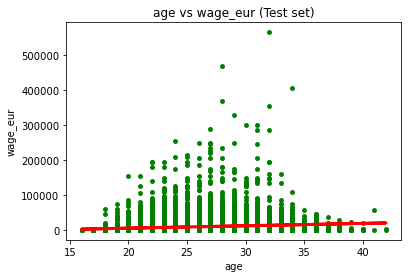

In [55]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_1_train, y_1_train, color='green', s = 15)
plot_test.plot(X_1_train, y_predicted_train_1, color='red', linewidth =3)
plot_test.title('age vs wage_eur (Test set)')
plot_test.xlabel('age')
plot_test.ylabel('wage_eur')
plot_test.show()

## There is much difference between the test set and the training set (confirmed by an R2 score of 0.021) this means that the data is overfitted